In [68]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import keras
keras.__version__

'2.0.6'

In [69]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [54]:
#用shape转换成一维向量，在用astype转换为float
x_train = x_train_image.reshape(60000, 784).astype('float')
x_test = x_test_image.reshape(10000, 784).astype('float')

#将image标准化
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

#执行one-hot encoding转换
y_train_one_hot = np_utils.to_categorical(y_train_label)
y_test_one_hot = np_utils.to_categorical(y_test_label)

In [55]:
#建立输入层和隐藏层
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
#查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
train_history = model.fit(x=x_train_normalize, y=y_train_one_hot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
11s - loss: 0.3489 - acc: 0.8959 - val_loss: 0.1668 - val_acc: 0.9531
Epoch 2/10
10s - loss: 0.1595 - acc: 0.9521 - val_loss: 0.1178 - val_acc: 0.9668
Epoch 3/10
10s - loss: 0.1128 - acc: 0.9665 - val_loss: 0.0963 - val_acc: 0.9711
Epoch 4/10
11s - loss: 0.0894 - acc: 0.9732 - val_loss: 0.0913 - val_acc: 0.9730
Epoch 5/10
10s - loss: 0.0742 - acc: 0.9776 - val_loss: 0.0830 - val_acc: 0.9750
Epoch 6/10
10s - loss: 0.0628 - acc: 0.9807 - val_loss: 0.0737 - val_acc: 0.9780
Epoch 7/10
11s - loss: 0.0552 - acc: 0.9830 - val_loss: 0.0724 - val_acc: 0.9783
Epoch 8/10
11s - loss: 0.0470 - acc: 0.9860 - val_loss: 0.0669 - val_acc: 0.9801
Epoch 9/10
11s - loss: 0.0427 - acc: 0.9868 - val_loss: 0.0709 - val_acc: 0.9788
Epoch 10/10
11s - loss: 0.0383 - acc: 0.9874 - val_loss: 0.0704 - val_acc: 0.9798


In [58]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
#查看数字图像，，真实的数据及预测结果
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if(len(prediction) > 0):
            title += ", predict=" + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

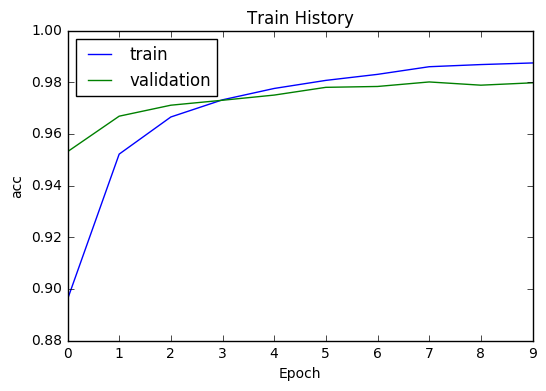

In [59]:
show_train_history(train_history, 'acc', 'val_acc')

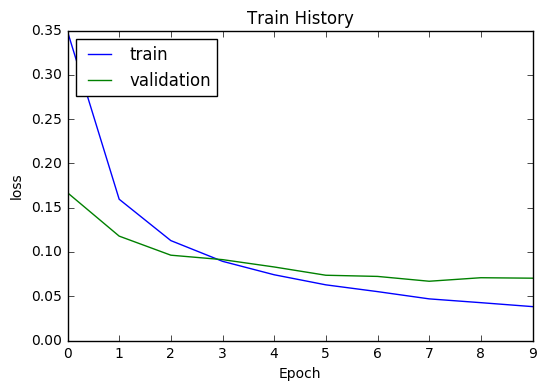

In [60]:
show_train_history(train_history, 'loss', 'val_loss')

In [61]:
#评估模型准确率
score = model.evaluate(x_test_normalize, y_test_one_hot)
print()
print('accuracy=', score[1])

10000/10000 [==============================] - 1s     

accuracy= 0.9803


In [62]:
#执行预测
pred = model.predict_classes(x_test)
pred

 9984/10000 [============================>.] - ETA: 0s

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

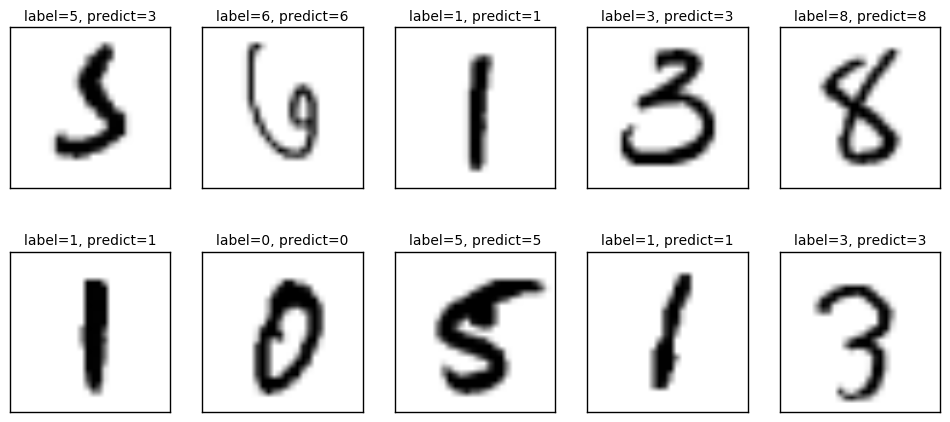

In [63]:
plot_images_labels_prediction(x_test_image, y_test_label, pred, idx=340)

In [64]:
import pandas as pd
pd.crosstab(y_test_label, pred, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,1,1,0,0,1,1,2,0
1,0,1127,3,1,0,0,1,0,3,0
2,3,1,1007,1,1,0,2,7,10,0
3,2,0,3,992,0,2,0,6,3,2
4,1,1,8,0,957,0,2,1,0,12
5,2,0,0,11,1,868,2,1,3,4
6,6,3,2,1,2,3,938,0,3,0
7,1,8,5,1,0,0,0,1006,2,5
8,4,1,2,4,1,1,1,4,953,3


In [65]:
df = pd.DataFrame({'label':y_test_label, 'predict':pred})
df[:2]

,label,predict
0,7,7
1,2,2


In [66]:
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
3902,5,3
4271,5,3
4360,5,3
5937,5,3


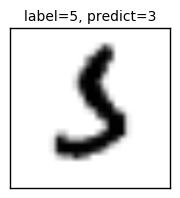

In [67]:
plot_images_labels_prediction(x_test_image, y_test_label, pred, idx=340, num=1)